# Manipulation des données spatiales avec R

-/-/- Author: Abdoulaye DIALLO   
-/-/- École: ENSAI               
-/-/- Cours: Spatial Data        

### Mes sources intéréssantes:

LIENS:  
#### [Auto.shading](https://www.rdocumentation.org/packages/GISTools/versions/0.7-4/topics/auto.shading)  
#### [Tmap functions obsolètes a connaitre](https://rdrr.io/cran/tmap/man/deprecated_functions.html)  
#### [Handling Spatial Data](http://statlearn.uos.ac.kr/rexample/handlingspatial.html)  
#### [Introduction aux données spatiales et à la cartographie](http://rstudio-pubs-static.s3.amazonaws.com/386998_a61d174be3bc468dabf53b5037ee0f82.html) Author: Lex Comber.  
#### [Basics of Handling Spatial Data in R](https://bookdown.org/lexcomber/brunsdoncomber2e/Ch3.html) Author: Lex Comber (sur bookdown.org)

---------------------

In [3]:
# Tools
options(warn=-1)
library(spgwr)
library(tmap)
library(ggplot2) # for the mapping tools
library(sf)
library(tibble)
library(GISTools)

library(rgdal)
library(grid)
library(spdep)

Loading required package: sp

Loading required package: spData

To access larger datasets in this package, install the spDataLarge
package with: `install.packages('spDataLarge',
repos='https://nowosad.github.io/drat/', type='source')`

NOTE: This package does not constitute approval of GWR
as a method of spatial analysis; see example(gwr)

Linking to GEOS 3.8.1, GDAL 3.1.4, PROJ 6.3.1

Loading required package: maptools

Checking rgeos availability: TRUE

Loading required package: RColorBrewer

Loading required package: MASS

Loading required package: rgeos

rgeos version: 0.5-5, (SVN revision 640)
 GEOS runtime version: 3.8.1-CAPI-1.13.3 
 Linking to sp version: 1.4-2 
 Polygon checking: TRUE 


rgdal: version: 1.5-18, (SVN revision 1082)
Geospatial Data Abstraction Library extensions to R successfully loaded
Loaded GDAL runtime: GDAL 3.1.4, released 2020/10/20
Path to GDAL shared files: /Library/Frameworks/R.framework/Versions/4.0/Resources/library/rgdal/gdal
GDAL binary built with G

## Question 1
Ecrire un code qui permet de représenter les comtés de Géorgie (dataframe georgia) en choisissant une couleur de votre choix mais avec 11 classes pour décrire la distribution du revenu médian en milliers de dollars (MedInc). Cette carte devra contenir une légende et doit permettre d’exporter cette carte en format TIFF.

In [25]:
data(georgia)
# type de donnée
class(georgia)

[1] "SpatialPolygonsDataFrame"
attr(,"package")
[1] "sp"

In [26]:
# conversion to sf
georgia_sf = st_as_sf(georgia)
class(georgia_sf)

[1] "sf"         "data.frame"

In [27]:
georgia_sf

,Latitude,Longitud,TotPop90,PctRural,PctBach,PctEld,PctFB,PctPov,PctBlack,X,Y,ID,Name,MedInc,geometry
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<MULTIPOLYGON [°]>
0,31.75339,-82.28558,15744,75.6,8.2,11.43,0.64,19.9,20.76,941396.6,3521764,13001,Appling,32152,MULTIPOLYGON (((-82.2252 31...
1,31.29486,-82.87474,6213,100.0,6.4,11.77,1.58,26.0,26.86,895553.0,3471916,13003,Atkinson,27657,MULTIPOLYGON (((-82.6293 31...
2,31.55678,-82.45115,9566,61.7,6.6,11.11,0.27,24.1,15.42,930946.4,3502787,13005,Bacon,29342,MULTIPOLYGON (((-82.52171 3...
3,31.33084,-84.45401,3615,100.0,9.4,13.17,0.11,24.8,51.67,745398.6,3474765,13007,Baker,29610,MULTIPOLYGON (((-84.1407 31...
4,33.07193,-83.25085,39530,42.7,13.3,8.64,1.43,17.5,42.39,849431.3,3665553,13009,Baldwin,36414,MULTIPOLYGON (((-83.27423 3...
5,34.35270,-83.50054,10308,100.0,6.4,11.37,0.34,15.1,3.49,819317.3,3807616,13011,Banks,41783,MULTIPOLYGON (((-83.39851 3...
6,33.99347,-83.71181,29721,64.6,9.2,10.63,0.92,14.7,11.44,803747.1,3769623,13013,Barrow,49829,MULTIPOLYGON (((-83.53751 3...
7,34.23840,-84.83918,55911,75.2,9.0,9.66,0.82,10.7,9.21,699011.5,3793408,13015,Bartow,47309,MULTIPOLYGON (((-84.6533 34...
8,31.75940,-83.21976,16245,47.0,7.6,12.81,0.33,22.0,31.33,863020.8,3520432,13017,Ben Hill,28009,MULTIPOLYGON (((-83.17781 3...


In [30]:
st_write(georgia_sf, "georgiadata.gpkg")

Writing layer `georgiadata' to data source `georgiadata.gpkg' using driver `GPKG'
Writing 159 features with 14 fields and geometry type Multi Polygon.


In [4]:
summary(georgia@data)

    Latitude        Longitud         TotPop90         PctRural     
 Min.   :30.72   Min.   :-85.50   Min.   :  1915   Min.   :  2.50  
 1st Qu.:31.79   1st Qu.:-84.44   1st Qu.:  9220   1st Qu.: 54.70  
 Median :32.75   Median :-83.69   Median : 16934   Median : 72.30  
 Mean   :32.81   Mean   :-83.58   Mean   : 40744   Mean   : 70.18  
 3rd Qu.:33.79   3rd Qu.:-82.85   3rd Qu.: 36058   3rd Qu.:100.00  
 Max.   :34.92   Max.   :-81.09   Max.   :648951   Max.   :100.00  
    PctBach          PctEld          PctFB           PctPov     
 Min.   : 4.20   Min.   : 1.46   Min.   :0.040   Min.   : 2.60  
 1st Qu.: 7.60   1st Qu.: 9.81   1st Qu.:0.415   1st Qu.:14.05  
 Median : 9.40   Median :12.07   Median :0.720   Median :18.60  
 Mean   :10.95   Mean   :11.74   Mean   :1.131   Mean   :19.34  
 3rd Qu.:12.00   3rd Qu.:13.70   3rd Qu.:1.265   3rd Qu.:24.65  
 Max.   :37.50   Max.   :22.96   Max.   :6.740   Max.   :35.90  
    PctBlack           X                 Y                 ID       


In [9]:
georgia_medInd = tm_shape(georgia_sf) +
  tm_polygons("MedInc", title = " Revenue Média", palette = "-GnBu",
              style = "kmeans",
              legend.hist = T) +
  tm_scale_bar(width = 0.22, position = c("right", "top")) +
  tm_compass()+
  tm_layout(frame = F, title = "Georgia", 
            title.size = 2, 
            #title.position = c(0.55, "top"), 
            legend.hist.size = 0.5, 
            legend.outside = T)

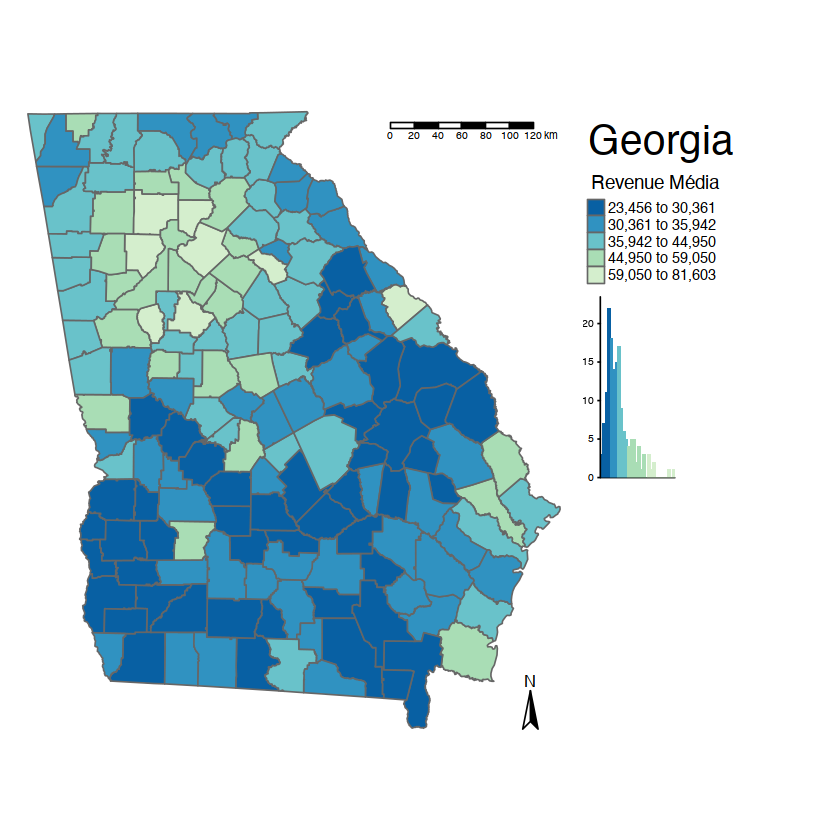

In [10]:
georgia_medInd

In [11]:
tmap_save(filename = "georgia_medInd.tiff")

Map saved to georgia_medInd.tiff

Resolution: 1951.103 by 2260.26 pixels

Size: 6.503677 by 7.534199 inches (300 dpi)



### Question 2
Il est connu que l’on peut faire dire des choses fallacieuses à des cartes. L’une des erreurs communes est de mal représenter la distribution d’une variable ne continue en ne la catégorisant pas de la bonne façon. Dans cette question vous devez produire trois cartes représentant la même variable en montrant comment le choix du cut peut influencer la représentation du phénomène sur la carte. Pour cela vous utiliserez la variable représentant le nombre de maisons dans le New Heaven (variable HSE_UNITS dans l’objet blocks) que vous découperez en 5 classes en utilisant différentes manières de constituer ces classes (quantiles, rangs absolus, écart-type). Rajouter des légendes sur vos cartes.


In [31]:
data(newhaven)
ls()

[1] "blocks"        "breach"        "burgres.f"     "burgres.n"    
 [5] "famdisp"       "georgia"       "georgia.polys" "georgia2"     
 [9] "georgia_sf"    "places"        "roads"         "tracts"

In [42]:
# Une vue de la dataset
blocks

class       : SpatialPolygonsDataFrame 
features    : 129 
extent      : 531731.9, 569625.3, 147854, 188464.6  (xmin, xmax, ymin, ymax)
crs         :  +proj=lcc +datum=NAD27 +lon_0=-72d45 +lat_1=41d52 +lat_2=41d12 +lat_0=40d50 +x_0=182880.3657607315 +y_0=0 +units=us-ft +no_defs +ellps=clrk66 +nadgrids=@conus,@alaska,@ntv2_0.gsb,@ntv1_can.dat 
variables   : 28
names       : NEWH075H_, NEWH075H_I, HSE_UNITS, OCCUPIED, VACANT,  P_VACANT, P_OWNEROCC, P_RENTROCC, NEWH075P_, NEWH075P_I, POP1990,   P_MALES, P_FEMALES,   P_WHITE,   P_BLACK, ... 
min values  :         2,         24,         0,        0,      0,         0,          0,          0,         2,        380,       0,         0,         0,         0,         0, ... 
max values  :       131,        152,      1557,     1506,    129, 37.931034,  91.666667,  94.669236,       130,        655,    4866, 63.287671, 72.222222, 99.417098, 96.200814, ... 

In [45]:
# conversion to sf
newhaven_sf = st_as_sf(blocks)
class(newhaven_sf)

[1] "sf"         "data.frame"

In [47]:
st_write(newhaven_sf, "newhaven.gpkg")

Writing layer `newhaven' to data source `newhaven.gpkg' using driver `GPKG'
Writing 129 features with 28 fields and geometry type Polygon.


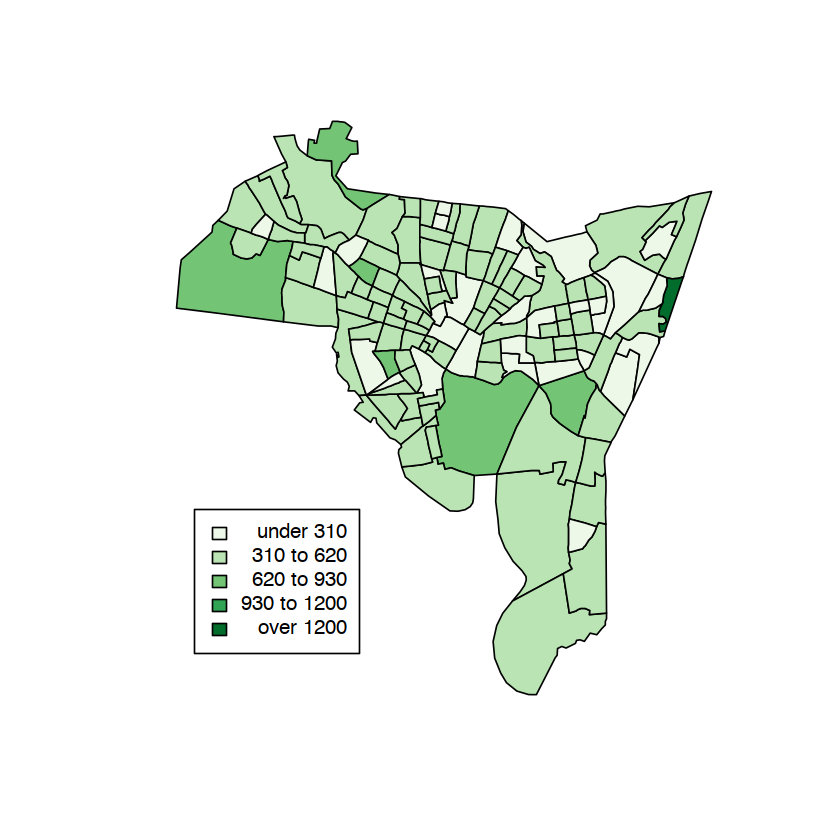

In [48]:
# 1 rangeCuts: equal sized
nbr_maison.cat3 = auto.shading(blocks$HSE_UNITS,
                               n=5,
                               cols = brewer.pal(5,"Greens"), 
                               cutter = rangeCuts)

choropleth(blocks,blocks$HSE_UNITS, shading = nbr_maison.cat3)
choro.legend(533000,161000,nbr_maison.cat3)

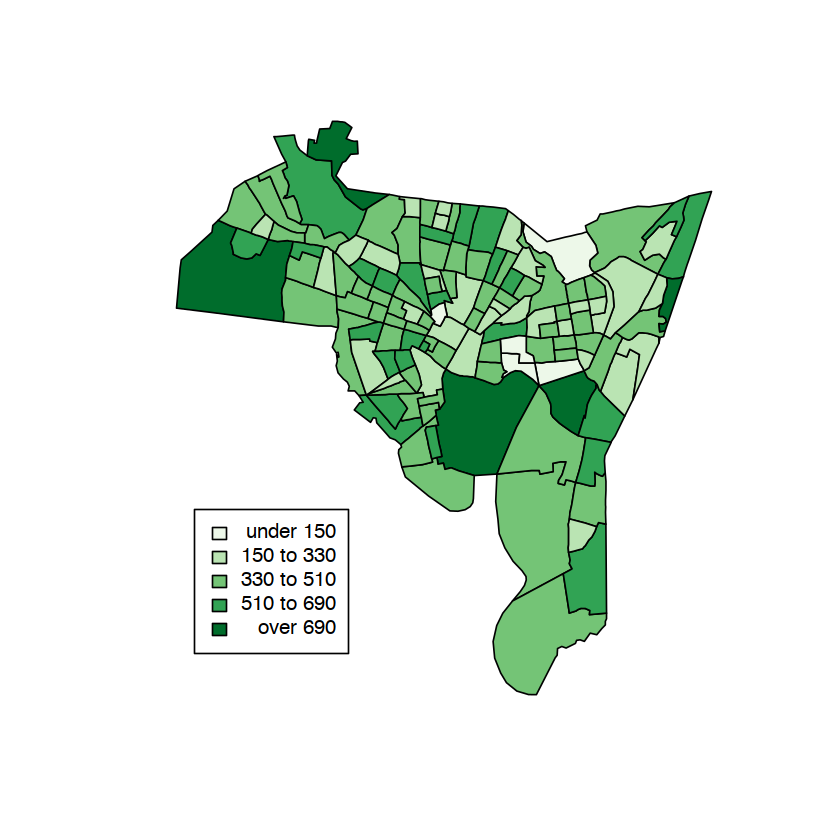

In [45]:
# 2. Découpage par sdCuts
nbr_maison.cat1 = auto.shading(blocks$HSE_UNITS,
                               n=5,
                               cols = brewer.pal(5,"Greens"),
                               cutter = sdCuts)

choropleth(blocks,blocks$HSE_UNITS,shading=nbr_maison.cat1) 
choro.legend(533000,161000,nbr_maison.cat1)

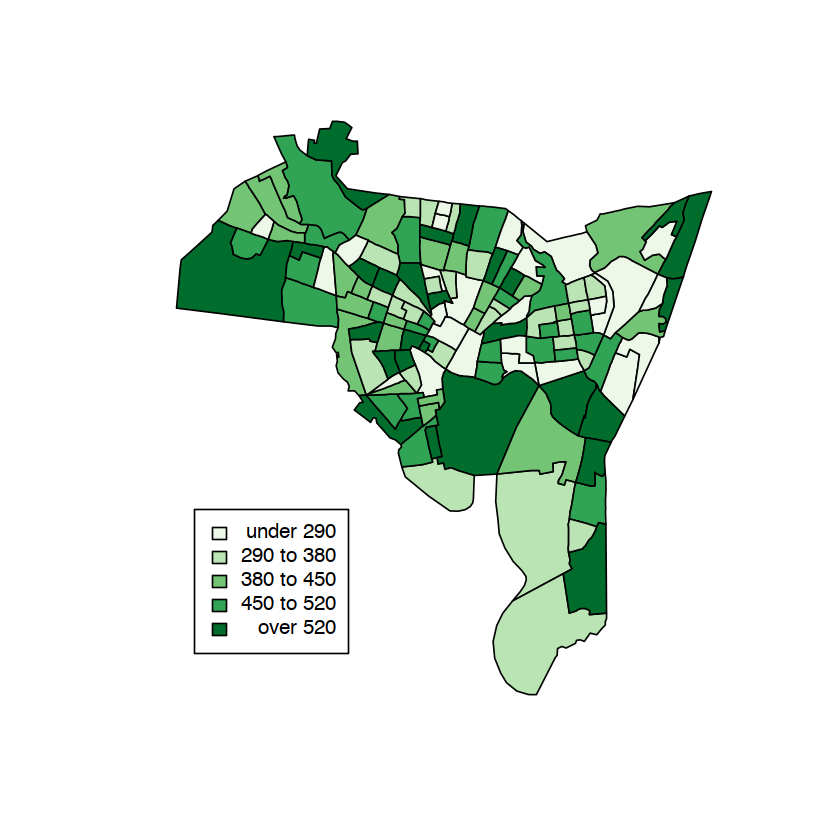

In [46]:
# 2. Avec quantileCuts 
nbr_maison.cat2 = auto.shading(blocks$HSE_UNITS,
                               cutter = quantileCuts,
                               n = 5,
                               cols = brewer.pal(5,"Greens"))

choropleth(blocks, blocks$HSE_UNITS, shading = nbr_maison.cat2)
choro.legend(533000,161000,nbr_maison.cat2)

#### Notes
En concervant la meme couleur on rermarque une différence de distribution de l'echelle des couleur, d'ou l'importance de choisir le meilleur moyen de cut.

## Question 3
Objectif : création d’un attribut secondaire et utiliser une condition logique pour sélectionner des objets quand cet opérateur logique s’applique aux attributs que vous venez de créer.  
Une entreprise souhaite commercialiser un produit en direction des populations vivant dans des zones rurales. Leur modèle leur permet de conclure qu’elle pourra vendre une unité de leur produit par tranche de 20 habitants de ces zones rurales visitées par un représentant de leur équipe de vente. Pour cela elle veut déterminer quels sont les comtés des données de Géorgie qui a une densité de 20 habitants par km². A partir des données écrire le code qui permet de sélectionner des comtés sur la base d’un critère de densité de population. Pour cela vous calculerez un score de densité de population et représenterez sur une carte les comtés qui ont une densité supérieure à 20 habitants par km²

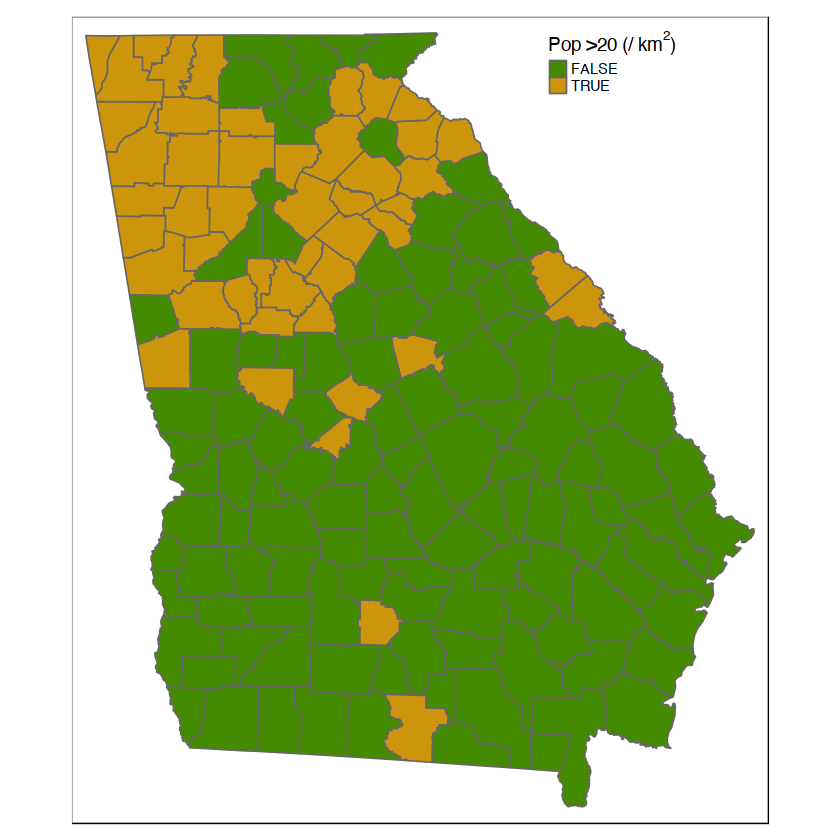

In [55]:
# Pop rural
georgia_sf$poprural = as.numeric(georgia_sf$PctRural * georgia_sf$TotPop90 / 100) # Ajoute de la variables poprural dasn la base georgia
# calcule de la superficie des comtés en Km^2
georgia_sf$aire_goergie = as.numeric(st_area(georgia_sf) / (1000* 1000))
# calcule de la densité rurale
georgia_sf$den_poprural = as.numeric(georgia_sf$poprural / georgia_sf$aire_goergie)

# sélection des comtés dont la densité est supérieure à 20
georgia_sf$den_poprural20 = (georgia_sf$den_poprural > 20) # Nouvelle variable den_poprural20, comtés avec densité supérieur à 20

# plot de la carte
tm_shape(georgia_sf) +
  tm_polygons("den_poprural20", 
    palette = c("chartreuse4", "darkgoldenrod3"),
        title = expression("Pop >20 (/ " * km^2 * ")"),
    auto.palette.mapping = F)